# Decision Tree

## ANN MARY PAUL

## Task 2

## Prediction using Decision Tree Algorithm

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [4]:
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv'])) 
print(df)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [5]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.info() #datatype checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.shape 

(150, 6)

In [8]:
df1=df.drop('Id',axis=1)

In [9]:
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Performing Exploratory Data Analysis

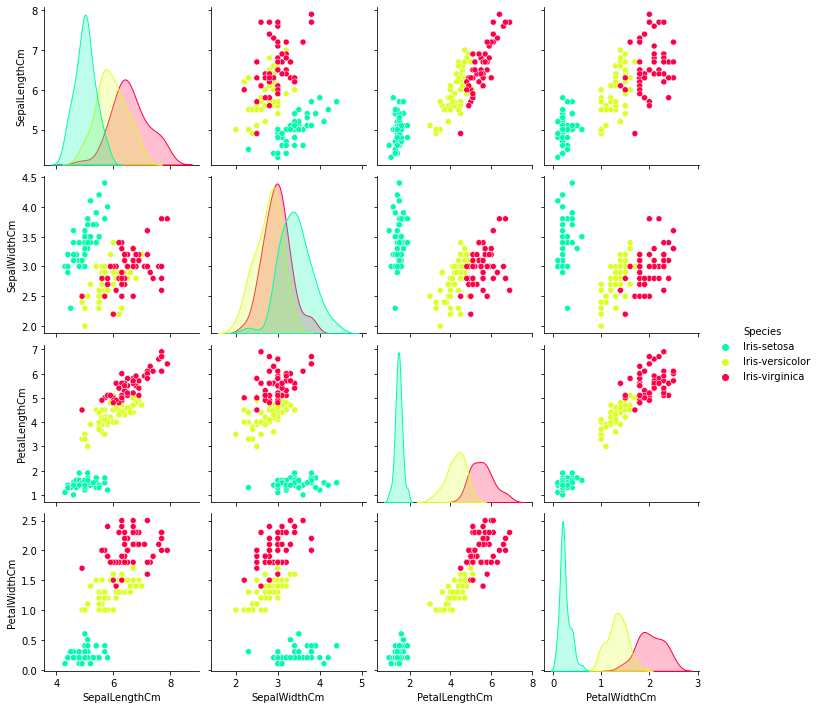

In [10]:
sns.pairplot(df1, hue='Species',palette='gist_ncar')

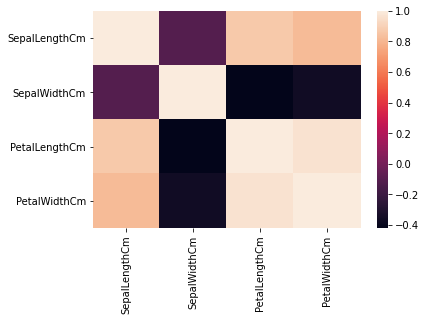

In [ ]:
sns.heatmap(df1.corr())

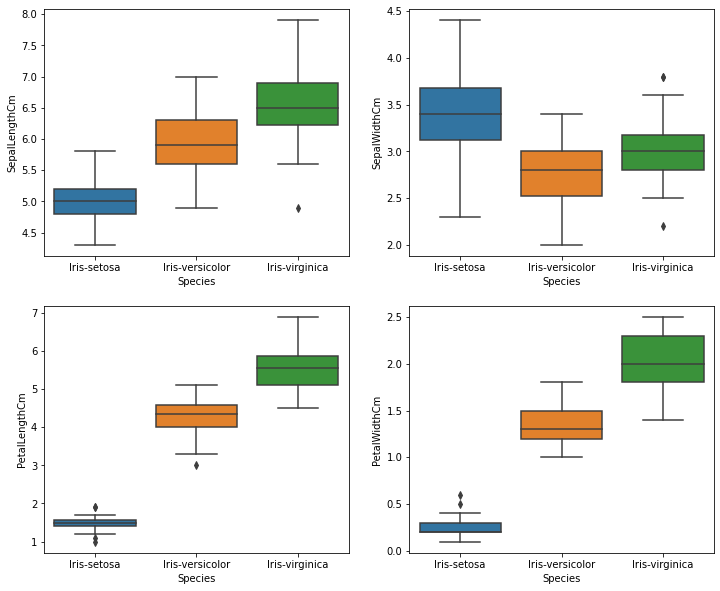

In [13]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="SepalLengthCm",data=df1)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="SepalWidthCm",data=df1)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="PetalLengthCm",data=df1)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="PetalWidthCm",data=df1)

## Train and Test

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X=df.drop(['Species','Id'],axis=1)
y=df['Species']

In [16]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state=1)

## Decision Tree Model

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Decision Tree is ready")



Decision Tree is ready


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [21]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9666666666666667


Text(0.5, 1.0, 'Accuracy Score: 0.9666666666666667')

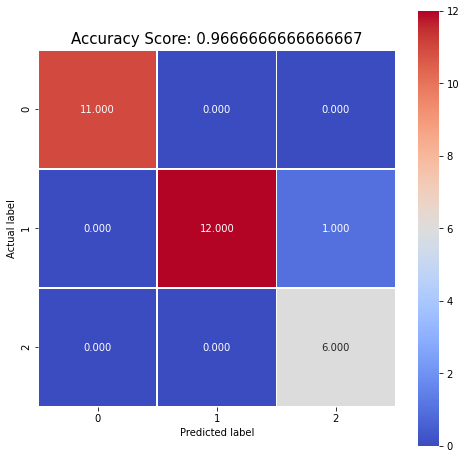

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'coolwarm');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score: {0}'.format(dt.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## Visualization of Decsion Tree

In [25]:
!pip install pydotplus
!pip install graphviz 

In [29]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

In [30]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'] ,  
                filled=True, rounded=True,special_characters=True)



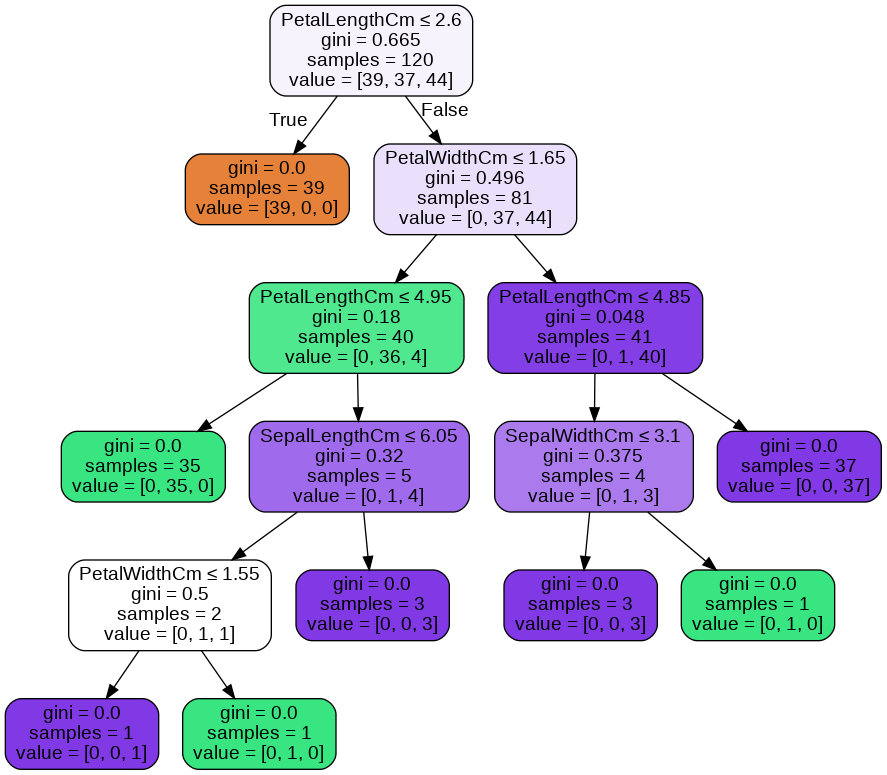

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())